# Esperimento Tubo 

## Importo Le Librerie

In [96]:
import numpy as np  
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit 
from scipy import odr
from ipywidgets import interact, interact_manual, FloatSlider, Checkbox, BoundedFloatText
from google.colab import files

##Fit Lineare

### Importo I Dati

#### Prima Misurazione

In [7]:
modo =          [1, 2, 3, 4, 5, 6, 7, 8, 9]
lunghezza_tubo = 0.9894 + 0.058 # m
lunghezza_tubo_err = 0.0005 # m
massimo =       [162, 64, 20, 19.60, 26.80, 28.80, 10.84, 11.28, 7.619] # mV
peak_to_peak =  [324, 136, 40.40, 39.20, 53.60, 57.20, 22.13, 23.22, 15.55] # mV
frequenza =     [165, 330, 495, 660, 825, 990, 1155, 1320, 1485] # Hz
frequenza_err = [0.3] * 9 # Hz
periodo =       [6.064, 3.024, 2.014, 1.512, 1.211, 1.006, 0.8659, 0.7551, 0.6719] # ms

#### Seconda Misurazione

In [58]:
modo =          [1, 2, 3, 4, 5, 6, 7, 8]#  5, 6, 7, 8, 9]
lunghezza_tubo = 0.98 # m
lunghezza_tubo_err = 0.0005 # m

amplitude = [0, 0, 0, 0, 0, 0, 206, 106]

peak_to_peak =  [299, 440, 320, 533, 739, 310, 218, 114] # mV
massimo =       [p / 2 for p in peak_to_peak] # mV
peak_to_peak_err = [5, 5, 11, 6, 5, 4, 8, 2]
frequenza =     [176.8, 353.6, 528.8, 704.6, 880.4, 1057.6, 1232.9, 1410.7] # Hz
frequenza_err = [0.3, 0.2, 0.4, 0.6, 0.3, 0.3, 0.4, 0.5]  # Hz
periodo =       [5.7, 2.83, 1.9, 1.42, 1.134, 0.946, 0.812, 0.709] # ms

### carico i dati su un file

In [31]:
with open("dati_armoniche.txt", "a") as f:
  row = ""
  for index in range(len(modo)):
    # modo + frequenza + ampiezza + periodo
    row += str(modo[index]) + "\t" + str(round(frequenza[index], 6)) + "\t" + str(round(peak_to_peak[index] * (10**(-3)), 6)) + "\t" + str(round(periodo[index] * (10 ** (-3)), 6)) + "\n"
  f.write(row)

In [59]:
k = []
k_err = []
w = []
w_err = []

for index in range(len(modo)):
  current_k = (modo[index] * np.pi) / lunghezza_tubo
  current_k_err = (lunghezza_tubo_err / lunghezza_tubo) * current_k
  k.append(current_k)
  k_err.append(current_k_err)

for index in range(len(modo)):
  current_w = (2 * np.pi) * frequenza[index]
  current_w_err = (0.3 / frequenza[index]) * current_w
  w.append(current_w)
  w_err.append(current_w_err)
  # print(f"frequenza: {frequenza[index]}\n w: {current_w} \n {current_w_err}")

pprint(k)
pprint(w)


[3.20570678937734,
 6.41141357875468,
 9.61712036813202,
 12.82282715750936,
 16.0285339468867,
 19.23424073626404,
 22.43994752564138,
 25.64565431501872]
[1110.867162309351,
 2221.734324618702,
 3322.548390436565,
 4427.132367438737,
 5531.716344440908,
 6645.09678087313,
 7746.539165221712,
 8863.689512838242]


### Plot Dei Dati

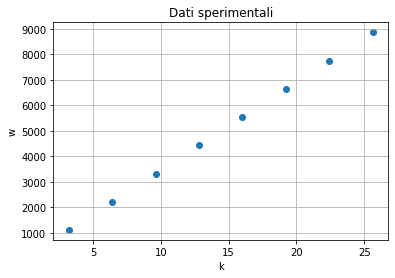

In [60]:
y=np.array(w)
x=np.array(k)
y_err = np.array(w_err)
x_err = np.array(k_err)

plt.figure()
plt.title("Dati sperimentali")
plt.xlabel("k")
plt.ylabel("w")
plt.grid()
_=plt.scatter(x,y)

### Fit Dei Dati

In [34]:
#Definizione funzione di fit 
def retta(x,A,B): 
  return A*x+B

In [61]:
# Fitting routine
# esegue il fit dei dati a partire da una stima dei dati iniziali
#
 
def fitplot(A, B, print_output=True):
 
  guess = np.array([A,B]) #array of initial guesses
  bounds = ([-np.inf,-np.inf], [np.inf,np.inf]) 

  plt.figure(figsize=(9, 6))
 
  popt, pcov = curve_fit(retta, x, y, p0=guess, bounds=bounds)

                                                                                                
  #plotting fit result
  plt.errorbar(x, y, xerr=x_err, yerr=y_err)
  plt.scatter(x,y, s=25, c = "c", label="Exp.")     #plot data points without errorbars
  plt.plot(x,retta(x,popt[0],popt[1]),color= "m" ,label="Fit",linewidth=1)
  plt.xlabel("K")
  plt.ylabel("w")
  plt.grid(which='both')
  plt.legend()
  plt.show()
  
  
  
  if print_output:
    label = ["velocità suono", "intercetta"]
    for l, v, e in zip(label, popt, np.sqrt(np.diag(pcov))) :
      print("%10s = %9.6f +- %7.6f" % (l ,v, e))
    print("\n")  

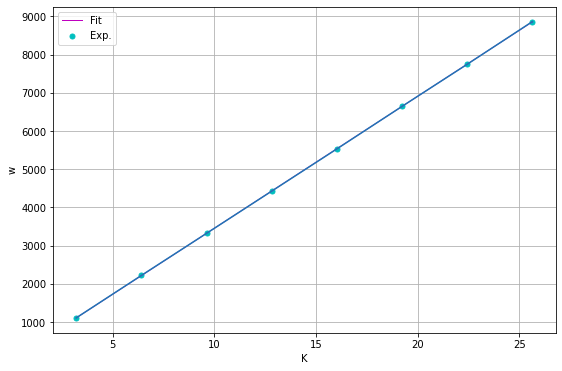

velocità suono = 345.240000 +- 0.218013
intercetta =  3.343552 +- 3.529189




In [62]:
#fitplot(A, B, print_output=True, plot_guess=False):
fitplot(300,0)

In [52]:
# errore suono
(0.0014318408148754724/2.9994201390011392) + (1.8849555921538756/1036.7255756846316)* 345.68

0.6289864634506224

## Fit gne

### Importo I Dati

In [83]:
temperatura = 23.4 # gradi centigradi

frequenza = {
    "modo-1": [
               100,
               110,
               120,
               130,
               140,
               150,
               155,
               160,
               165,
               167,
               169,
               171,
               173,
               175,
               176,
               177,
               178,
               179,
               180,
               182,
               184,
               186,
               188,
               190,
               192,
               194,
               199,
               204,
               214,      
               234,
               254,
    ],
    "modo-2": [
               271,
               281,
               291,
               301,
               311,
               321,
               326,
               331,
               336,
               338,
               340,
               342,
               344,
               346,
               348,
               349,
               350,
               351,
               352,
               353,
               354,
               355,
               356,
               357,
               359,
               361,
               363,
               365,
               370,
               375,
               380,
               385,
               390,
               400,
               410,
               420,
               430,
               440,
               450,
               460,
     ],
    "modo-3": [
               475,
               485,
               495,
               505, # di 10 in 10
               510,
               515,
               520, # di 5 in 5
               522,
               524,
               526, # di 2 in 2
               527,
               528,
               529, # armonica 3
               530,
               531,
               532, # di 2 in 2
               534,
               536,
               538,
               540, # di 5 in 5
               545,
               550,
               555, # di 10 in 10
               565,
               575,
               585,
    ]
}

ampiezza = {
    "modo-1": [
               38,
               40,
               54,
               54,
               62,
               76,
               88,
               110,
               148,
               166,
               190,
               216,
               244,
               264,
               276,
               284,
               280,
               272,
               256,
               220,
               184,
               152,
               128,
               108,
               96,
               88,
               64,
               48,
               40,
               32,
               28
    ],
    "modo-2": [
               32,
               31,
               34,
               38,
               44,
               54,
               60,
               65,
               81,
               88,
               102,
               108,
               128,
               152,
               190,
               216,
               244,
               286,
               348,
               400,
               454,
               432,
               380,
               324,
               236,
               176,
               140,
               112,
               80,
               64,
               46,
               38,
               32,
               27,
               26,
               20,
               19,
               20,
               19,
               19,

    ],
    "modo-3": [
               20,
               23,
               28,
               37,
               46,
               62,
               93,
               115,
               160,
               236,
               300,
               380,
               420,
               372,
               296,
               232,
               160,
               120,
               96,
               80,
               55,
               44,
               37,
               29,
               25,
               22
    ]
}

### Carico Dati

In [90]:
with open("dati_ampiezza_modo_1.txt", "w") as f:
  row = ""
  for index in range(len(frequenza["modo-1"])):
    row += str(frequenza["modo-2"][index]) + "\t" + str(round(ampiezza["modo-1"][index] * (10**(-3)), 4  )) + "\n"
  f.write(row)

# print(len(frequenza["modo-1"]))

IndexError: ignored

### Plot Dei Dati

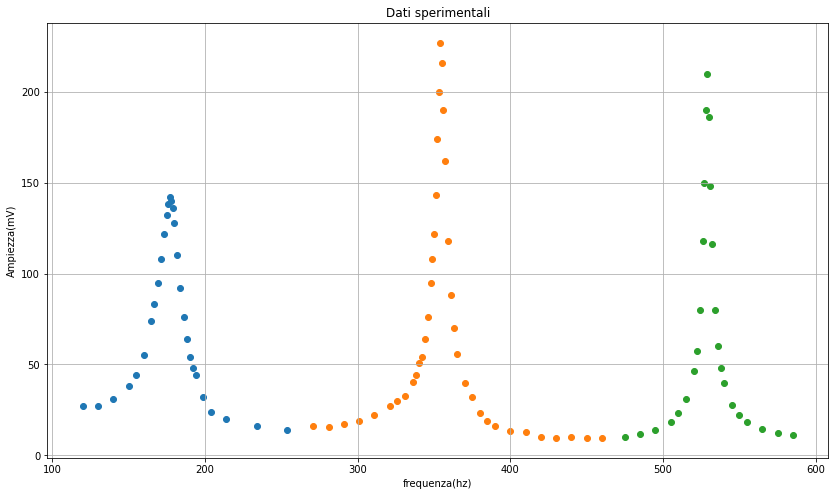

In [169]:
x=np.array(frequenza["modo-1"][2:])
y=np.array([k / 2 for k in ampiezza["modo-1"]][2:])
k = np.array(frequenza["modo-2"])
j = np.array([k / 2 for k in ampiezza["modo-2"]])
p = np.array(frequenza["modo-3"])
u = np.array([k / 2 for k in ampiezza["modo-3"]])
#y_err = np.array(w_err)
#x_err = np.array(k_err)

plt.figure(figsize=(14, 8))
plt.title("Dati sperimentali")
plt.xlabel("frequenza(hz)")
plt.ylabel("Ampiezza(mV)")
plt.grid()
plt.scatter(x,y)
plt.scatter(k, j)
plt.scatter(p, u)

### Fit Dei Dati

In [167]:
def funzione_fit(p, frequenza):
  w_0 = 2 * np.pi * 176.8
  y = p[0] / (np.sqrt((w_0 **2 - (2 * np.pi * frequenza) ** 2) + 4* (p[1]**2)*((2 * np.pi * frequenza)**2) ))
  return y 

In [168]:
def fitplot(a, gamma):
  modello = odr.Model(funzione_fit)
  fit_data = odr.RealData(x, y)
  beta0 = np.array([a,gamma]) #array of initial guesses
  fit = odr.ODR(fit_data, modello, beta0=beta0)
  out = fit.run()
  sample_x = np.linspace(0,np.amax(x),1000)
  plt.show()
  plt.figure(figsize=(9, 6))
  plt.scatter(x, y)
  plt.plot(sample_x, funzione_fit(out.beta, sample_x), color=[1,0,0], linewidth=3)
  plt.grid(which='both')
  plt.legend()
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
No handles with labels found to put in legend.


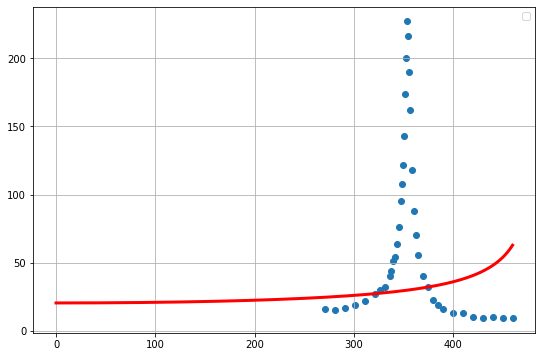

In [166]:
fitplot(0.55, 1.4)